In [3]:
import scipy as sc
from scipy import signal
import os   #used for directory work
import matplotlib.pyplot as plt #used for creating plots
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import numpy as np
import matplotlib.patches as mpatches #used for plot legends
%matplotlib inline

from commonly_used_functions import lin_rb, fast_fourier_spectra

In [2]:
p="2019_West_Tower_3mAGL_Sweep_Data_for_Diane_Joey.xlsx"
df1= pd.read_excel( p,"Pre-FFP")#,na_values = ['NAN', "00nan", "NaN"])
df2= pd.read_excel( p, "FFP")
df3=pd.read_excel( p,"Post-FFP")

KeyboardInterrupt: 

In [ ]:
len(df2)//2


In [ ]:
sx1,sy1 = fast_fourier_spectra(list(df1["S'w' (Sweep)"]),binn = 100, T= 0.1, redist = False)
sx2,sy2 = fast_fourier_spectra(list(df2["S'w' (Sweep)"]),binn = 100, T= 0.1, redist = False)
sx3,sy3 = fast_fourier_spectra(list(df3["S'w' (Sweep)"]),binn = 100, T= 0.1, redist = False)

nx1,ny1 = fast_fourier_spectra(list(df1["S'w' (Sweep)"]),binn = 100, T= 0.1, redist = False,welch=True )
nx2,ny2 = fast_fourier_spectra(list(df2["S'w' (Sweep)"]),binn = 100, T= 0.1, redist = False,welch=True )
nx3,ny3 = fast_fourier_spectra(list(df3["S'w' (Sweep)"]),binn = 100, T= 0.1, redist = False,welch=True )


In [ ]:
plt.figure(figsize = (14,10))

#plt.plot(sx1,sy1, c = "lime", label = "Pre-FFP")
#plt.plot(sx2,sy2, c = "r", label = "FFP")
#plt.plot(sx3,sy3, c = "k", label = "Post-FFP")

plt.plot(nx1,ny1, c = "lime", label = "interp Pre-FFP", linestyle = "--")
plt.plot(nx2,ny2, c = "r", label = "nterp FFP", linestyle = "--")
plt.plot(nx3,ny3, c = "k", label = "nterp Post-FFP", linestyle = "--")

#g_x, g_y = guide_ln_5_3(7)
#plt.plot(g_x,g_y, color = "k", linestyle = "--", label = "5/3")
#g_x2, g_y2 = guide_ln_2_3(3)
#plt.plot(g_x2,g_y2, color = "gray", linestyle = "--", label = "2/3")

plt.title("S'W' Spectra of West Tower 3m 2019", fontsize = 22)
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Frequency", fontsize = 15)
plt.ylabel(r"$S_{S'W'}(n)$", fontsize = 15)
#plt.ylim(0,170)
plt.xlim(10**-3,1)
plt.legend()
plt.grid()
plt.savefig("Welch-Check_on_Spectral_Codes-Joey.png",dpi=350)

In [4]:
test_file= pd.read_csv("01_input_data.txt", skiprows =0)
t_lst = list(test_file['   j           U(j)'])
values = []
for i in t_lst:
    values.append(float(str(i[4:]).strip(" ")))

In [5]:
x,y = fast_fourier_spectra(values,binn = 10, T= 1, redist = False)

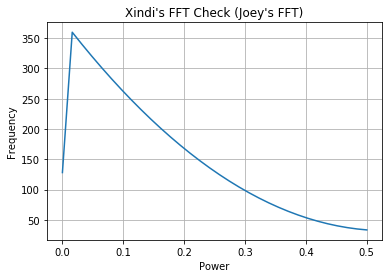

In [11]:
plt.title("Xindi's FFT Check (Joey's FFT)")
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.plot(x,y)
#plt.yscale("log")
#plt.xscale("log")
plt.grid()
plt.savefig("fft-check-Joey.png",dpi=350)

In [12]:
w_x,w_y = fast_fourier_spectra(values,binn = 10, T= 1, redist = False, welch= True, fs = 1)

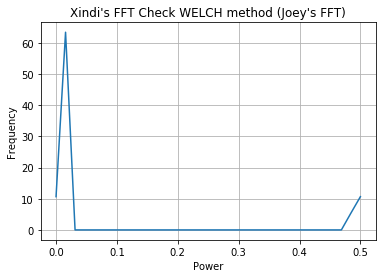

In [13]:
plt.title("Xindi's FFT Check WELCH method (Joey's FFT)")
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.plot(w_x,w_y)
#plt.yscale("log")
#plt.xscale("log")
plt.grid()
plt.savefig("wlc-check-Joey.png",dpi=350)